In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('movie_data.csv')

In [3]:
df.head()

,id,title,budget,genre,popularity,release_date,revenue,runtime,vote_average
0,100,"Lock, Stock and Two Smoking Barrels",1350000,Crime,4.60786,1998-03-05,3897569.0,105.0,7.5
1,100,"Lock, Stock and Two Smoking Barrels",1350000,Comedy,4.60786,1998-03-05,3897569.0,105.0,7.5
2,10003,The Saint,68000000,Action,10.97633,1997-04-03,118063304.0,116.0,5.9
3,10003,The Saint,68000000,Adventure,10.97633,1997-04-03,118063304.0,116.0,5.9
4,10003,The Saint,68000000,Science Fiction,10.97633,1997-04-03,118063304.0,116.0,5.9


In [4]:
df.columns

Index(['id', 'title', 'budget', 'genre', 'popularity', 'release_date',
       'revenue', 'runtime', 'vote_average'],
      dtype='object')

In [5]:
X = df[["revenue"]].to_numpy()

In [6]:
# view the correlation coefficient (R) for each pair of variables
# R is the square root of R-squared
# A correlation matrix helps select features that are highly predictive of our dependent variable
# It also helps us identify collinearity between independent variables
corr = df.corr()
corr.head()

,id,budget,popularity,revenue,runtime,vote_average
id,1.000000,-0.059349,0.056268,-0.023054,-0.033592,-0.085490
budget,-0.059349,1.000000,0.355149,0.742081,0.209087,0.094859
popularity,0.056268,0.355149,1.000000,0.477056,0.099458,0.179561
revenue,-0.023054,0.742081,0.477056,1.000000,0.159796,0.190755
runtime,-0.033592,0.209087,0.099458,0.159796,1.000000,0.268294


<AxesSubplot:>

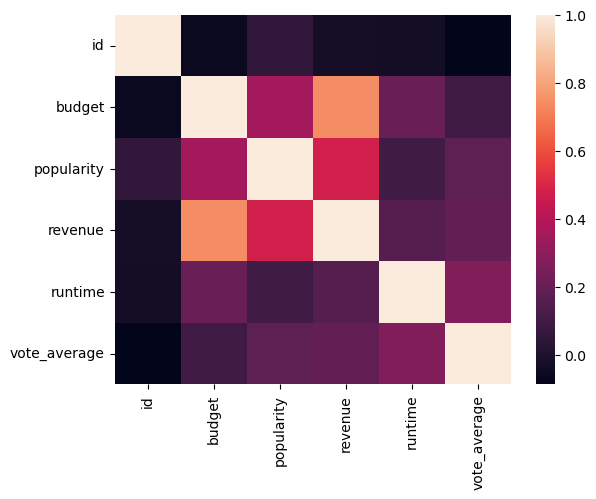

In [7]:
sns.heatmap(corr)

In [8]:
mask = np.triu(np.ones_like(corr, dtype=bool))

<AxesSubplot:>

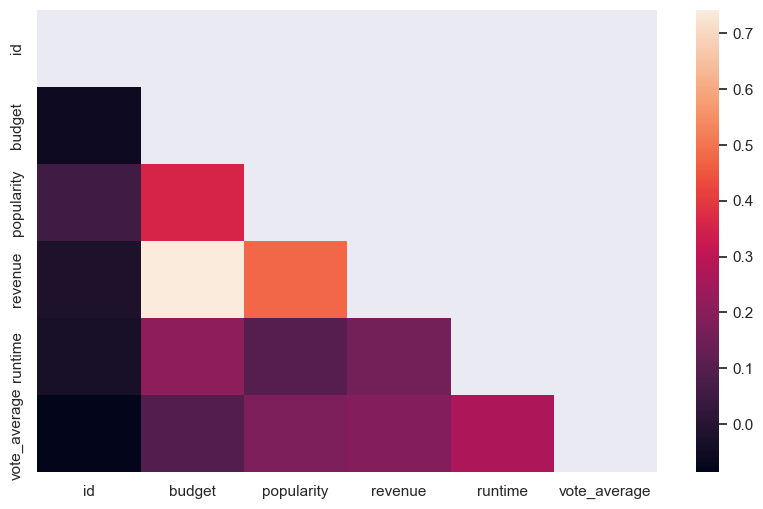

In [9]:
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(corr, mask=mask)


In [10]:
corr["revenue"]

id             -0.023054
budget          0.742081
popularity      0.477056
revenue         1.000000
runtime         0.159796
vote_average    0.190755
Name: revenue, dtype: float64

In [12]:
y = df[["budget", "popularity", "vote_average"]]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

1. Preview data
1. Select model
1. Select features to include in model
1. Split data into train and test sets
1. Fit the model to the training set
1. Create predictions for the test set
1. Score the model based on the training and test sets

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

y = m1x1 + m2x2 + m3x3 + b

dependent variable = coefficient * independent variable + intercept

In [16]:
coef = model.coef_
print(coef)

[[1.79317389e-01]
 [4.17354469e-08]
 [1.40532781e-09]]


In [17]:
intercept = model.intercept_
print(intercept)

[1.35979954e+07 5.36206394e+00 5.95928214e+00]


Easier way to create the predicted data:

In [18]:
pred_y = model.predict(X_train)
pred_y

array([[1.35979954e+07, 5.36206394e+00, 5.95928214e+00],
       [1.53194423e+07, 5.76272423e+00, 5.97277329e+00],
       [2.36374956e+07, 7.69871980e+00, 6.03796268e+00],
       ...,
       [3.51475146e+07, 1.03776334e+01, 6.12816782e+00],
       [1.35979954e+07, 5.36206394e+00, 5.95928214e+00],
       [2.31875604e+07, 7.59399910e+00, 6.03443649e+00]])

In [19]:
y_test_pred = model.predict(X_test)

In [20]:
train_score = model.score(X_train, y_train)

In [21]:
test_score = model.score(X_test, y_test)

In [22]:
# R-squared value
train_score

0.27375416754471166

In [23]:
test_score

0.26164651056741084

In [24]:
from statsmodels.api import OLS

In [25]:
model2 = OLS(X_train, y_train)

In [26]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.657
Method:                 Least Squares   F-statistic:                          1.049e+04
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:40:25   Log-Likelihood:                     -3.2598e+05
No. Observations:               16438   AIC:                                  6.520e+05
Df Residuals:                   16435   BIC:                                  6.520e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
budget           2.6256      0.022    120.017      0.000       2.583       2.668
popularity    2.919e+06   6.27e+04     46.558      0.000     2.8e+06    3.04e+06
vote_average -3.533e+06   1.61e+05    -21.933      0.000   -3.85e+06   -3.22e+06
==============================================================================
Omnibus:                    15049.622   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1464574.407
Skew:                           4.059   Prob(JB):                         0.00
Kurtosis:                      48.524   Cond. No.                     9.59e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
y = df[["budget", "popularity"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [30]:
train_score

0.39198741199344805

In [31]:
test_score

0.37558436828272385

In [32]:
model2 = OLS(X_train, y_train)

In [33]:
model2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.647
Model:                            OLS   Adj. R-squared (uncentered):              0.647
Method:                 Least Squares   F-statistic:                          1.506e+04
Date:                Mon, 24 Oct 2022   Prob (F-statistic):                        0.00
Time:                        19:41:56   Log-Likelihood:                     -3.2622e+05
No. Observations:               16438   AIC:                                  6.524e+05
Df Residuals:                   16436   BIC:                                  6.525e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
budget         2.4434      0.021    119.003      0.000       2.403       2.484
popularity  2.459e+06   5.99e+04     41.024      0.000    2.34e+06    2.58e+06
==============================================================================
Omnibus:                    16825.319   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2065131.748
Skew:                           4.842   Prob(JB):                         0.00
Kurtosis:                      57.050   Cond. No.                     3.48e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
y = df[["budget"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

In [36]:
train_score

0.5459582895976168

In [37]:
test_score

0.5634031299703515